In [1]:
from pythtb import TBModel, WFArray, Mesh
from pythtb.utils import pauli_decompose
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def ssh(v, w):
    lat = [[1]]
    orb = [[-1/4], [1/4]]
    my_model = TBModel(1, 1, lat, orb)

    my_model.set_hop(v, 0, 1, [0])
    my_model.set_hop(w, 1, 0, [1])

    return my_model

(<Figure size 800x800 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

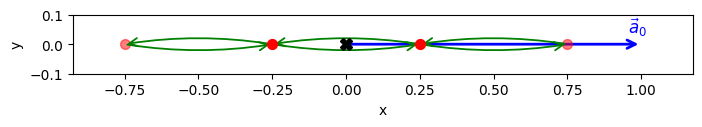

In [3]:
model = ssh(1, 1)
model.visualize()

In [4]:
nlam = 100
w_values = np.linspace(0, 1, nlam)
v = 0.5
evals_w = []
evecs_w = []
n_cells = 30
for w in w_values:
    finite_model = ssh(v, w).cut_piece(n_cells, 0)
    evals, evecs = finite_model.solve_ham(return_eigvecs=True)
    evals_w.append(evals)
    evecs_w.append(evecs)

Text(0.5, 1.0, 'Edge state density at $w=1.0$')

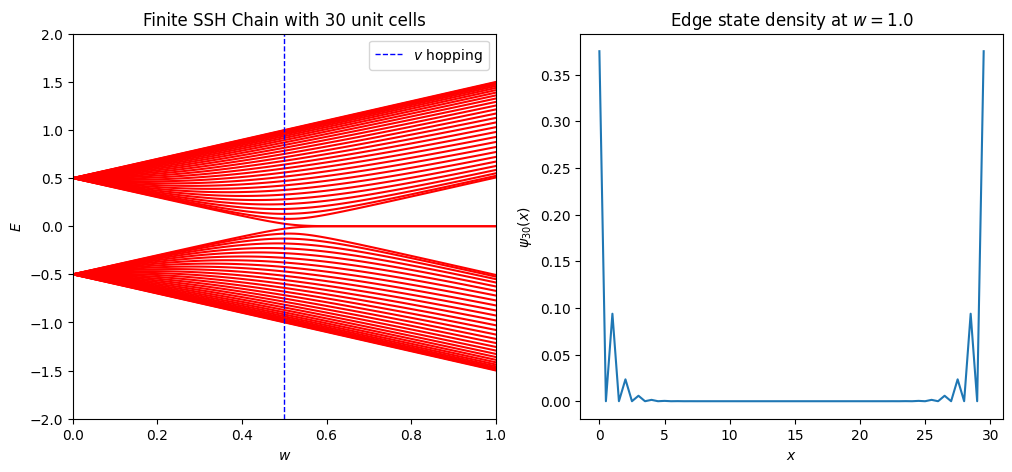

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the eigenvalues
ax1.plot(w_values, evals_w, c='r')

# Mark the v hopping on the plot
ax1.axvline(x=v, color='b', linestyle='--', lw=1, label=r'$v$ hopping')

ax1.set_xlabel(r"$w$")
ax1.set_ylabel(r"$E$")
ax1.set_xlim(0, 1.0)
ax1.set_ylim(-2, 2)
ax1.set_title(f"Finite SSH Chain with {n_cells} unit cells")
ax1.legend()

# Plot edge state density at last w=1.0
band_idx = n_cells
density = np.abs(evecs_w[-1][band_idx, :])**2
position = np.arange(len(density)) / 2
ax2.plot(position, density)
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(rf"$\psi_{{{band_idx}}}(x)$")
ax2.set_title(r"Edge state density at $w=1.0$")


In [6]:
model = ssh(v, 0)
nk = 100

mesh = Mesh(dim_k=1, axis_types=['k'])
mesh.build_grid(shape=(nk,))

wfa = WFArray(model, mesh)
wfa.solve_mesh()
P1 = wfa.berry_phase([1], 0) / (2 * np.pi)
P1

np.float64(1.4330909576946256e-17)

In [7]:
model = ssh(v, 1)
nk = 100

mesh = Mesh(dim_k=1, axis_types=['k'])
mesh.build_grid(shape=(nk,))

wfa = WFArray(model, mesh)
wfa.solve_mesh()
P2 = wfa.berry_phase([0], 0) / (2 * np.pi)
P2

np.float64(-0.5)